# STK 353 2023

# Assignment 2: Sampling
Answer the following questions using Python. Please set the following seed for each question.
- numpy.random.seed(12345): The seed of the simulation.
  
Also, take the following iterations for each question needed:

- $M = 10000$: The number of Monte Carlo replications
- $B = 1000$: The number of Bootstrap replications


In [3]:
pip install bootstrap-stat


Note: you may need to restart the kernel to use updated packages.


In [23]:
#Install packages
import numpy as np
import pandas as pd
from bootstrap_stat import datasets as data
import matplotlib.pyplot as plt
import scipy.stats as stat
import os
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import beta




In [38]:
import numpy as np

# Set the seed
np.random.seed(12345)

# Define the number of Monte Carlo replications (M) and Bootstrap replications (B)
M = 10000
B = 1000


## Question 1
If 2 balls are randomly drawn **with replacement** from a bowl containing 6 white and 4 black balls, then approximate the probability of the following events by using the Monte Carlo simulations and compare the results with the exact solutions.

- a) What is the probability that both of the balls are black?
- b) What is the probability that one of the balls is white and the other one black?

In [39]:
event_a_count = 0 
event_b_count = 0  

# Probabilities for the exact solutions
exact_prob_event_a = (4/10) * (4/10)  
exact_prob_event_b = 2 * (6/10) * (4/10)  

# Perform Monte Carlo simulations
for _ in range(M):
    # Simulate two random draws with replacement from the bowl
    draws = np.random.choice(['white', 'black'], size=2, p=[6/10, 4/10])
    
    # Check if event a occurs (both balls are black)
    if (draws[0] == 'black') and (draws[1] == 'black'):
        event_a_count += 1
    
    # Check if event b occurs (one ball is white and the other is black)
    if ((draws[0] == 'white' and draws[1] == 'black') or
        (draws[0] == 'black' and draws[1] == 'white')):
        event_b_count += 1

# Calculate the simulated probabilities
simulated_prob_event_a = event_a_count / M
simulated_prob_event_b = event_b_count / M

print("Simulated Probability of Event a:", simulated_prob_event_a)
print("Exact Probability of Event a:", exact_prob_event_a)

print("Simulated Probability of Event b:", simulated_prob_event_b)
print("Exact Probability of Event b:", exact_prob_event_b)


Simulated Probability of Event a: 0.1611
Exact Probability of Event a: 0.16000000000000003
Simulated Probability of Event b: 0.4866
Exact Probability of Event b: 0.48


## Question 2

The $Pareto(a, b)$ distribution has cdf

$$F (x) = 1 - \left(\dfrac{\sigma}{x}\right)^\alpha, \qquad x > \sigma,$$

where $\sigma >0$ and $\alpha > 0$. 

- a) Use the PIT method to simulate a random sample of size $M$ from the $Pareto(2, 3)$ distribution. Graph the histogram of the sample with the $Pareto(2, 3)$ density superimposed for comparison.
- b) If the lifetime of a component (in hours) follows from $Pareto(2, 3)$ distribution, then what is the approximated probability that it fails before 5 hours? Compare your answer with the exact one.

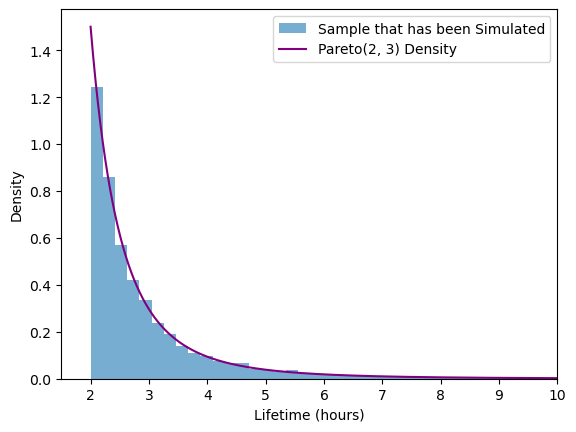

Probability of Failing Before 5 Hours-Simulated: 0.9344
Probability of Failing Before 5 Hours-Exact: 0.9359999999999999


In [42]:
alpha = 2
sigma = 3

uniform_s = np.random.uniform(0,1,M)

pareto_s = alpha / (np.power(1 - sample_uniform, 1/sigma))

# Plot the histogram
plt.xlim(1.5,10)
plt.hist(pareto_s, bins=200, density=True, alpha=0.6, label='Sample that has been Simulated')
x = np.linspace(alpha, max(pareto_s), M)
density_pareto = sigma * np.power(alpha, sigma) / np.power(x, sigma + 1)
plt.plot(x, density_pareto, 'purple', label='Pareto(2, 3) Density')
plt.xlabel('Lifetime (hours)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculate the approximated probability that it fails before 5 hours
prob = np.mean(pareto_s < 5)

# Exact solution for the probability of failing before 5 hours
exactprob = 1 - np.power(alpha/5, sigma)

print("Probability of Failing Before 5 Hours-Simulated:", prob)
print("Probability of Failing Before 5 Hours-Exact:", exactprob)



## Question 3
Write a function to generate a random sample of size $n$ from the $Beta(a, b)$ distribution by the acceptance-rejection method. Generate a random sample of size $M$ from the $Beta(3,2)$ distribution. Graph the histogram of the sample with the theoretical $Beta(3,2)$ density curve.

_Hint: Use the standard uniform distribution U(0, 1) as the proposal._

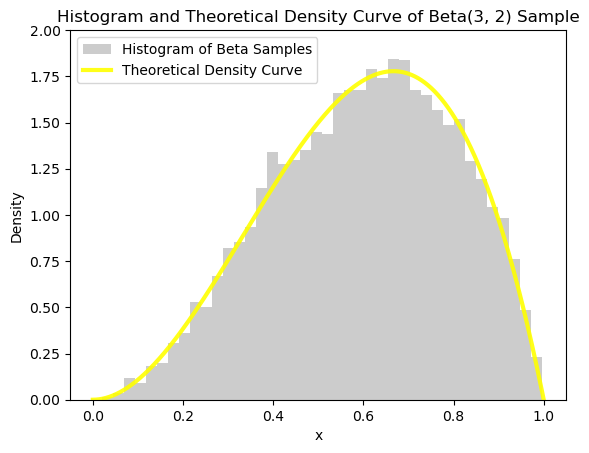

In [36]:
# Acceptance-Rejection Algorithm Function
def a_r_beta(x):
    samples = beta(3,2)
    return samples.pdf(x)

np.random.seed(12345)
k=0
a = 3
b = 2
M = 10000
max_pdf = a_r_beta((a - 1) / (a + b - 2))
beta_samples = np.zeros(M)

while k < M:
    x=np.random.uniform(0,1,1)
    y=np.random.uniform(0,1,1)
    if a_r_beta(y)/max_pdf > x:
        beta_samples[k] = y
        k+=1

x = np.linspace(0, 1, M)
plt.ylim(0,2)
# Histogram of the samples of Beta(3,2)
plt.hist(beta_samples, bins=40, density=True, alpha=0.2, color='black', label = 'Histogram of Beta Samples')
# The Theoretical distribution Beta(3,2)
plt.plot(x, a_r_beta(x), 'yellow', alpha= 0.9, lw=3 ,label='Theoretical Density Curve')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram and Theoretical Density Curve of Beta(3, 2) Sample')
plt.show()

## Question 4

A telecommunications company wants to estimate the churn rate of its customers. Implement the Bootstrap method to estimate the 90% confidence interval for the churn rate. The following observations are the only available information from the churn rate

churn_data = (1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1).

In [9]:
np.random.seed(12345)
B = 1000

churn_data = np.array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])


bootstrap_churn_rates = []

#Bootstrap resampling
for _ in range(B):
    bootstrap_sample = np.random.choice(churn_data, size=len(churn_data), replace=True)
    
    # Calculate the churn rate for the Bootstrap sample
    churn_rate = np.mean(bootstrap_sample)
    bootstrap_churn_rates.append(churn_rate)

# Calculate the 90% confidence interval
lower_percentile = np.percentile(bootstrap_churn_rates, 5) 
upper_percentile = np.percentile(bootstrap_churn_rates, 95)  

print("90% Confidence Interval for Churn Rate:", (lower_percentile, upper_percentile))


90% Confidence Interval for Churn Rate: (0.25, 0.65)


## Question 5

You are analyzing daily temperature data for a city. Implement the Bootstrap method to estimate the 95% confidence interval for the average daily temperature if we have observed the following records for the last 10 days (in °C)

Temp = (25.2, 27.5, 23.8, 22.1, 26.7, 24.5, 28.3, 25.9, 23.6, 27.8)

In [10]:
np.random.seed(12345)
B = 1000

temperature_data = np.array([25.2, 27.5, 23.8, 22.1, 26.7, 24.5, 28.3, 25.9, 23.6, 27.8])

bootstrap_temperatures = []

#Bootstrap resampling
for _ in range(B):
    bootstrap_sample = np.random.choice(temperature_data, size=len(temperature_data), replace=True)
    
    # Calculate the average daily temperature for the Bootstrap sample
    avg_temperature = np.mean(bootstrap_sample)
    bootstrap_temperatures.append(avg_temperature)

# Calculate the 95% confidence interval
lower_percentile = np.percentile(bootstrap_temperatures, 2.5)  
upper_percentile = np.percentile(bootstrap_temperatures, 97.5)  

print("95% Confidence Interval for Average Daily Temperature (°C):", (lower_percentile, upper_percentile))


95% Confidence Interval for Average Daily Temperature (°C): (24.29, 26.73025)


## Question 6

Each year, all American Bar Association (ABA) approved law schools within the United States must make disclosures to the ABA. These required disclosures include bar passage rates by state and the aggregate undergraduate GPA and LSAT scores of incoming students. The LSAT is the test law school applicants take prior to law school. It's the most important criterion in law school admissions, and a low score is law school death.

Consider the following small data set of the LSAT variable:

In [27]:
from bootstrap_stat import datasets as data
law = data.law_data()
law

,LSAT,GPA
0,576,3.39
1,635,3.30
2,558,2.81
3,578,3.03
4,666,3.44
5,580,3.07
6,555,3.00
7,661,3.43
8,651,3.36
9,605,3.13


If the parameter of interest is the standard deviation of the LSAT scores of the incoming students ($\sigma$), then by using the sample standard deviation ($\hat\sigma$) as the estimator of $\sigma$, answer the following questions using the Bootstrap resampling method:

- a) Obtain the value of $\hat\sigma$ for the original sample.
- b) Obtain some properties of $\hat\sigma$ including the Bias, SD and the MSE. How do you interpret the Bias obtained?
- c) Obtain the Bootstrap distribution of $\hat\sigma$.

In [29]:
#A) 

standard_dev = np.std(law['LSAT'])  

print("Sample Standard Deviation (σ̂) for the Original Sample:", standard_dev)

Sample Standard Deviation (σ̂) for the Original Sample: 40.37733137403819


In [31]:
# B)
np.random.seed(12345)
B = 1000

bootstrap_std_devs = []

#Bootstrap resampling 
for _ in range(B):
    bootstrap_sample = np.random.choice(law['LSAT'], size=len(law['LSAT']), replace=True)
    # Calculate the Bootstrap sample standard deviation
    bootstrap_std_dev = np.std(bootstrap_sample)
    bootstrap_std_devs.append(bootstrap_std_dev)

# Calculate the Bias, SD, and MSE
bias = np.mean(bootstrap_std_devs) - standard_dev
sd = np.std(bootstrap_std_devs)
mse = sd**2 + bias**2

# Display the properties of σ̂
print("Bias of σ̂:", bias)
print("Standard Deviation of σ̂:", sd)
print("Mean Squared Error (MSE) of σ̂:", mse)

Bias of σ̂: -1.7634189485715979
Standard Deviation of σ̂: 4.601151362981111
Mean Squared Error (MSE) of σ̂: 24.280240253244294


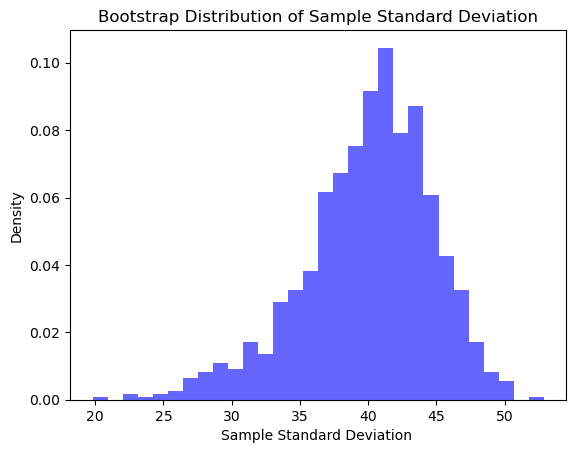

In [16]:
# C)

# Plot a histogram of the Bootstrap estimates of σ̂
plt.hist(bootstrap_std_devs, bins=30, density=True, alpha=0.6, color='blue')
plt.xlabel('Sample Standard Deviation ')
plt.ylabel('Density')
plt.title('Bootstrap Distribution of Sample Standard Deviation')
plt.show()


## Question 7

Consider the following integral

$$\int_0^2 \dfrac{1}{3\sqrt{2\pi}}e^{\dfrac{-(x - 1)^2}{18}}dx.$$

- a) What probability is this integral calculating? Compute it via a built-in Python function.
- b) Approximate it using the Monte Carlo integration and compare your answer with the one of Part (a).

In [34]:
np.random.seed(12345)
alpha, sigma = 1, 3
a, b = 0, 2
M=10000


np.random.seed(12345)
prob_exact = stat.norm.cdf(b,alpha,sigma) - stat.norm.cdf(a,alpha,sigma)

u = np.random.uniform(a,b,M)
prob_estimate = (b-a)*np.mean(1/(3*np.sqrt(2*np.pi))*np.exp(-(u-1)**2/18))

print(prob_exact)
print(prob_estimate)


0.26111731963647267
0.2610792286316631
